初值问题：

$$ \left\{
\begin{aligned}
    y''&=4y\\
    y(0)&=1\\
    y(1)&=3
\end{aligned}
\right.$$

The solution to the initial value problem is y(1)=2.999999884532403


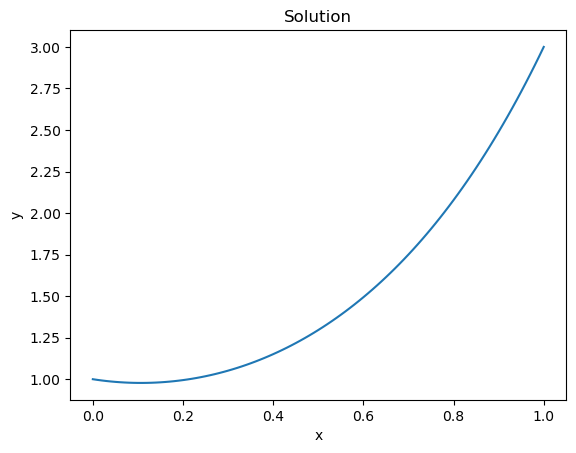

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def f(x, y):
    """
    定义微分方程组
    """
    return [y[1], 4*y[0]]

def shoot(z0):
    """
    求解微分方程初值问题
    """
    sol = solve_ivp(f, [0, 1], [1, z0], dense_output=True)
    y1 = sol.sol(1)[0]  # 取得数值解在 x=1 处的值
    return y1 - 3  # 计算数值解在 x=1 处的偏差

# 使用二分法求解初始条件 z0 的值
a, b = -10, 10
while b - a > 1e-6:
    c = (a + b) / 2
    if shoot(c) * shoot(a) <= 0:
        b = c
    else:
        a = c
z0 = (a + b) / 2

# 求解初值问题并输出结果
sol = solve_ivp(f, [0, 1], [1, z0], dense_output=True)
x = np.linspace(0, 1, 101)
y = sol.sol(x)[0]
print(f"The solution to the initial value problem is y(1)={y[-1]}")

# 输出 y 和 x 的关系图像
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution")
plt.show()

